# LangGraph 에이전트
## 도구 없음

## 라이브러리 임포트

In [1]:
from langchain_core.messages import HumanMessage
from langchain_anthropic import ChatAnthropic
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import END, START, StateGraph, MessagesState
import logging
from IPython.display import Image, Markdown, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

## 로깅 설정

In [2]:
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

logging.basicConfig(
    filename='langgraph_notebook.log',  
    level=logging.INFO,
)

## 에이전트와 모델 설정

In [3]:
model = ChatAnthropic(model="claude-sonnet-4-20250514", temperature=0)
# 책을 번역할 당시의 Anthropic 모델은 'claude-3-5-sonnet-20240620'이었지만, 현재는 위 모델로 업데이트 되었습니다.

def call_model(state: MessagesState):
    messages = state['messages']
    response = model.invoke(messages)
    return {"messages": [response]}

workflow = StateGraph(MessagesState)

workflow.add_node("agent", call_model)

workflow.add_edge(START, "agent")

checkpointer = MemorySaver()

app = workflow.compile(checkpointer=checkpointer)

## 그래프 시각화하기

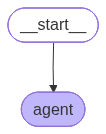

In [4]:
display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

## 에이전트와 대화하기

In [5]:
final_state = app.invoke(
    {"messages": [HumanMessage(content="What teams did Joe Montana play for?")]},
    config={"configurable": {"thread_id": 99}}
)
display(Markdown(final_state["messages"][-1].content))

Joe Montana played for two NFL teams during his career:

1. **San Francisco 49ers** (1979-1992) - This is where he spent the majority of his career and achieved his greatest success, winning four Super Bowl championships (1981, 1984, 1988, 1989).

2. **Kansas City Chiefs** (1993-1994) - He finished his career with the Chiefs, playing his final two seasons there.

Montana is most famously associated with the 49ers, where he earned the nickname "Joe Cool" and became one of the greatest quarterbacks in NFL history.

In [6]:
final_state = app.invoke(
    {"messages": [HumanMessage(content="Joe Montana는 어떤 팀에서 뛰었나요?")]},
    config={"configurable": {"thread_id": 99}}
)
display(Markdown(final_state["messages"][-1].content))

Joe Montana는 NFL에서 두 팀에서 뛰었습니다:

1. **샌프란시스코 49ers** (1979-1992) - 그의 커리어 대부분을 보낸 팀으로, 여기서 가장 큰 성공을 거두었습니다. 4번의 슈퍼볼 우승(1981, 1984, 1988, 1989)을 차지했습니다.

2. **캔자스시티 치프스** (1993-1994) - 마지막 2시즌을 치프스에서 보내며 은퇴했습니다.

Joe Montana는 49ers에서 가장 유명하며, 그곳에서 "Joe Cool"이라는 별명을 얻고 NFL 역사상 최고의 쿼터백 중 한 명이 되었습니다.

In [7]:
final_state = app.invoke(
    {"messages": [HumanMessage(content="What are the leagues in the SportsWorldCentral fantasy football platform?")]},
    config={"configurable": {"thread_id": 99}}
)
display(Markdown(final_state["messages"][-1].content))

I don't have specific information about the leagues available on the SportsWorldCentral fantasy football platform. I'm not familiar with the current structure, league types, or specific offerings of that particular fantasy sports platform.

To get accurate information about SportsWorldCentral's fantasy football leagues, I'd recommend:

1. Visiting their official website directly
2. Checking their help section or FAQ
3. Contacting their customer support
4. Looking at their mobile app if they have one

Fantasy football platforms typically offer various league types like public leagues, private leagues, dynasty leagues, redraft leagues, and different scoring formats, but the specific details would vary by platform.

In [8]:
final_state = app.invoke(
    {"messages": [HumanMessage(content="SportsWorldCentral 판타지 풋볼 플랫폼에는 어떤 리그들이 있나요?")]},
    config={"configurable": {"thread_id": 99}}
)
display(Markdown(final_state["messages"][-1].content))

SportsWorldCentral 판타지 풋볼 플랫폼의 구체적인 리그 정보에 대해서는 제가 알고 있는 정보가 없습니다. 해당 판타지 스포츠 플랫폼의 현재 구조, 리그 유형, 또는 특별한 서비스에 대한 구체적인 내용을 파악하지 못하고 있습니다.

SportsWorldCentral의 판타지 풋볼 리그에 대한 정확한 정보를 얻으시려면 다음을 추천드립니다:

1. 공식 웹사이트를 직접 방문하기
2. 도움말 섹션이나 FAQ 확인하기
3. 고객 지원팀에 문의하기
4. 모바일 앱이 있다면 확인해보기

일반적으로 판타지 풋볼 플랫폼들은 공개 리그, 비공개 리그, 다이너스티 리그, 재드래프트 리그, 그리고 다양한 점수 시스템 등을 제공하지만, 구체적인 세부사항은 플랫폼마다 다를 수 있습니다.

In [9]:
final_state = app.invoke(
    {"messages": [HumanMessage(content="What are the leagues in the MyFantasyLeague fantasy football platform?")]},
    config={"configurable": {"thread_id": 99}}
)
display(Markdown(final_state["messages"][-1].content))

MyFantasyLeague (MFL) is a well-established fantasy football platform that offers several types of leagues and formats. Here are the main league types typically available:

**League Formats:**
1. **Redraft Leagues** - Standard season-long leagues where you draft new teams each year
2. **Dynasty Leagues** - Multi-year leagues where you keep your entire roster from year to year
3. **Keeper Leagues** - You can retain a certain number of players from your previous season's roster
4. **Best Ball Leagues** - No weekly lineup management required; your best performers automatically start

**League Structures:**
- **Public Leagues** - Open to anyone to join
- **Private Leagues** - Invitation-only leagues
- **Salary Cap Leagues** - Draft and manage players within a budget constraint
- **Contract Leagues** - Players have multi-year contracts with varying salaries

**Scoring Options:**
- Standard scoring
- PPR (Points Per Reception)
- Custom scoring systems

MyFantasyLeague is known for being highly customizable, allowing commissioners to create very detailed and complex league rules. However, for the most current and specific league offerings, I'd recommend checking their official website at MyFantasyLeague.com, as their available formats and features may have been updated since my last knowledge update.

In [10]:
final_state = app.invoke(
    {"messages": [HumanMessage(content="MyFantasyLeague 판타지 풋볼 플랫폼에는 어떤 리그들이 있나요?")]},
    config={"configurable": {"thread_id": 99}}
)
display(Markdown(final_state["messages"][-1].content))

MyFantasyLeague (MFL)는 잘 알려진 판타지 풋볼 플랫폼으로 여러 종류의 리그와 형식을 제공합니다. 주요 리그 유형들은 다음과 같습니다:

**리그 형식:**
1. **Redraft 리그** - 매년 새로운 팀을 드래프트하는 표준 시즌 리그
2. **Dynasty 리그** - 전체 로스터를 매년 유지하는 다년간 리그
3. **Keeper 리그** - 이전 시즌 로스터에서 일정 수의 선수를 유지할 수 있는 리그
4. **Best Ball 리그** - 주간 라인업 관리가 필요 없이 최고 성과 선수들이 자동으로 출전

**리그 구조:**
- **Public 리그** - 누구나 참여 가능한 공개 리그
- **Private 리그** - 초대받은 사람만 참여 가능한 비공개 리그
- **Salary Cap 리그** - 예산 제약 내에서 선수를 드래프트하고 관리
- **Contract 리그** - 선수들이 다양한 연봉의 다년 계약을 갖는 리그

**점수 시스템:**
- 표준 점수 시스템
- PPR (리셉션당 포인트)
- 맞춤형 점수 시스템

MyFantasyLeague는 높은 커스터마이징이 가능한 것으로 유명하며, 커미셔너들이 매우 세부적이고 복잡한 리그 규칙을 만들 수 있습니다. 하지만 가장 최신의 구체적인 리그 제공 사항은 MyFantasyLeague.com 공식 웹사이트에서 확인하시기를 추천드립니다.